## Q1: MLR with 2 or more variables – Machine tools company

Benedrix, a machine tool company in interested in understand the impact of machine
hours and production run, on its overhead cost.
The data on a monthly basis for 3 years is provided in the dataset:
MLR_FactoryOverhead.csv
Fit the regression equations:
- Overhead = F (machine hours)
- Overhead = F (production runs)
- Overhead = F (machine hours, production runs)


Kindly answer the below 
- a) Find the R-Squared in all 3 cases.
- b) How would you explain the additional lift in R-squared of the combined model vs
each of the individual model?

### Importing libraries and creating functions

#### Importing libraries

In [4]:
import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from scipy import stats as st
import statsmodels.api as sm

#### Creating functions for OLS and Variance Inflation Factor

In [5]:
#Creating a function for carrying out the steps related to OLS

def ols_fn(y,x):
    X = x
    Y = y
    X = sm.add_constant(X)
    
    op_model = sm.OLS(Y,X).fit()
    print(op_model.summary())
    return op_model

#Creating a function to return variance inflation factor

def vif(x):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    X = x
    vif = pd.Series([variance_inflation_factor(X.values,i) 
                                   for i in range(X.shape[1])], 
                                   index=X.columns)
    return vif




#### Creating a function for the residual plot

In [78]:
#Creating a function for residual plot

def resid_plot(reg_model,feature):
    # Define figure size
    figure1 = plt.figure(figsize=(8,8))

    # Produce regression plots for logreg_model
    fig = sm.graphics.plot_regress_exog(reg_model, feature , fig = figure1)




In [13]:
df_fact_oh_1 = pd.read_csv('MLR_FactoryOverhead.csv')
df_fact_oh_1.head()

,Month,Machine Hours,Production Runs,Overhead Cost
0,1,1539,31,99798
1,2,1284,29,87804
2,3,1490,27,93681
3,4,1355,22,82262
4,5,1500,35,106968


In [14]:
#Checking data quality
df_fact_oh_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Month            36 non-null     int64
 1   Machine Hours    36 non-null     int64
 2   Production Runs  36 non-null     int64
 3   Overhead Cost    36 non-null     int64
dtypes: int64(4)
memory usage: 1.2 KB


In [15]:
#Renaming the columns to snake case

df_fact_oh_1.columns = ['month','machine_hours','production_runs', 'overhead_cost']
df_fact_oh_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   month            36 non-null     int64
 1   machine_hours    36 non-null     int64
 2   production_runs  36 non-null     int64
 3   overhead_cost    36 non-null     int64
dtypes: int64(4)
memory usage: 1.2 KB


In [16]:
#Creating the reg model w.r.t. 'Machine Hours'
X1 = df_fact_oh_1.machine_hours
Y1 = df_fact_oh_1.overhead_cost

reg_model_1 = ols_fn(Y1,X1)

                            OLS Regression Results                            
Dep. Variable:          overhead_cost   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     22.60
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           3.57e-05
Time:                        20:32:29   Log-Likelihood:                -376.13
No. Observations:                  36   AIC:                             756.3
Df Residuals:                      34   BIC:                             759.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.862e+04   1.07e+04      4.533

In [17]:
#Creating the reg model w.r.t. 'Production Runs'
X2 = df_fact_oh_1.production_runs
Y2 = df_fact_oh_1.overhead_cost

reg_model_2 = ols_fn(Y2,X2)

                            OLS Regression Results                            
Dep. Variable:          overhead_cost   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     12.64
Date:                Sun, 04 Sep 2022   Prob (F-statistic):            0.00114
Time:                        20:33:22   Log-Likelihood:                -379.62
No. Observations:                  36   AIC:                             763.2
Df Residuals:                      34   BIC:                             766.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            7.561e+04   6808.611     

In [18]:
#Creating the reg model w.r.t. both 'Machine Hours' and Production Runs'
X3 = df_fact_oh_1[['machine_hours','production_runs']]
Y3 = df_fact_oh_1.overhead_cost

reg_model_3 = ols_fn(Y3,X3)

                            OLS Regression Results                            
Dep. Variable:          overhead_cost   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     107.0
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           3.75e-15
Time:                        20:35:40   Log-Likelihood:                -349.07
No. Observations:                  36   AIC:                             704.1
Df Residuals:                      33   BIC:                             708.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3996.6782   6603.651     

In [22]:
#Presenting the rsquare of all the three models

print('OLS w.r.t. Machine Hours has a fit measure of ', reg_model_1.rsquared)
print('OLS w.r.t. Production Runs has a fit measure of ', reg_model_2.rsquared)
print('OLS w.r.t. both Machine Hours and Production Runs has a fit measure of ', reg_model_3.rsquared)

OLS w.r.t. Machine Hours has a fit measure of  0.39927805304353947
OLS w.r.t. Production Runs has a fit measure of  0.2709655638064029
OLS w.r.t. both Machine Hours and Production Runs has a fit measure of  0.8664250205523255


#### Ans 1(b) - R2 increases for the addition of every new variable as it assumes that every independent variable explains the variations in the independent variable. 

Ref- https://www.analyticsvidhya.com/blog/2021/05/the-game-of-increasing-r-squared-in-a-regression-model/

## Q2. MLR with categorical variables – Courier Service

GoKart is a regional delivery service company providing different types of package
delivery services. An analyst wants to estimate the cost of shipping a package as
function of cargo type.
Cost of 15 randomly chosen packages of approximately the same weight, shipped to
almost similar distance, is provided in the file: MLR_CourierService.csv

Kindly answer the below :

- a) Estimate the appropriate multiple linear regression equation to predict the cost of
shipping a package.
- b) Provide interpretation for the regression coefficients.
- c) Which cargo type is the costliest? Which one is least costly?
- d) How well does the regression fit the sample data? How can the goodness of fitness
be improved?
- e) Predict the cost of shipping a package with semi-fragile cargo

In [24]:
#Reading the file to a dataframe

df_gokart = pd.read_csv('MLR_CourierService.csv')
df_gokart.head()

,Shipment,CargType,CosoShipment
0,1,Semifragile,84.0
1,2,Durable,24.0
2,3,Fragile,165.6
3,4,Fragile,133.2
4,5,Semifragile,120.0


In [25]:
#Checking for data quality

df_gokart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Shipment      15 non-null     int64  
 1   CargType      15 non-null     object 
 2   CosoShipment  15 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 488.0+ bytes


In [34]:
#Renaming the columns and changing to snake case

df_gokart.columns = ['shipment_no', 'cargo_type', 'shipment_cost']
print(df_gokart.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   shipment_no    15 non-null     int64  
 1   cargo_type     15 non-null     object 
 2   shipment_cost  15 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 488.0+ bytes
None


In [36]:
print('Types of cargo and totals')
print('\n')
print(df_gokart.cargo_type.value_counts())

Types of cargo and totals


Semifragile    5
Fragile        5
Durable        5
Name: cargo_type, dtype: int64


<AxesSubplot:xlabel='cargo_type', ylabel='shipment_cost'>

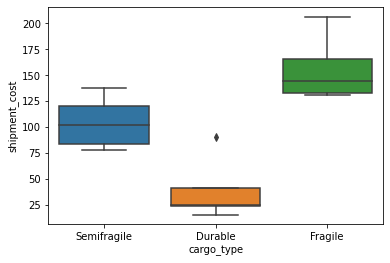

In [42]:
#Checking for shipment cost by cargo type

sns.boxplot(y="shipment_cost", x="cargo_type", data=df_gokart)


In [52]:
#Encoding the data with dummy encoding
x = df_gokart

df_gokart_2 = pd.get_dummies(x,drop_first=False) # One of the categories is not dropped as the final model would required all three
df_gokart_2.head()

,shipment_no,shipment_cost,cargo_type_Durable,cargo_type_Fragile,cargo_type_Semifragile
0,1,84.0,0,0,1
1,2,24.0,1,0,0
2,3,165.6,0,1,0
3,4,133.2,0,1,0
4,5,120.0,0,0,1


In [53]:
#Creating an OLS for the encoded data

Y1 = df_gokart.shipment_cost
X1 = df_gokart_2[['cargo_type_Fragile' , 'cargo_type_Semifragile' , 'cargo_type_Durable']]

reg_model_gokart_1 = ols_fn(Y1,X1)

                            OLS Regression Results                            
Dep. Variable:          shipment_cost   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     20.61
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           0.000132
Time:                        21:43:48   Log-Likelihood:                -70.043
No. Observations:                  15   AIC:                             146.1
Df Residuals:                      12   BIC:                             148.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     74

C:\Users\NageshN\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Ans 2(a) - The regression equation is 

shipment_cost = 74.88 + 81.12 x cargo_type_Fragile + 29.52 x cargo_type_Semifragile - 35.76 x cargo_type_Durable  

#### Ans 2(b) - Interpretation for the regression coefficients - There are three interpretations :

- if Cargo Type is Fragile, shipment cost = 74.88 + 81.12 = 156
- if Cargo Type is Semi Fragile, shipment cost = 74.88 + 29.52 = 104.39
- if Cargo Type is Durable, shipment cost = 74.88 - 35.76 = 39.12

#### Ans 2(c) - Most expensive and least expensive cargo types - 


<AxesSubplot:xlabel='cargo_type', ylabel='shipment_cost'>

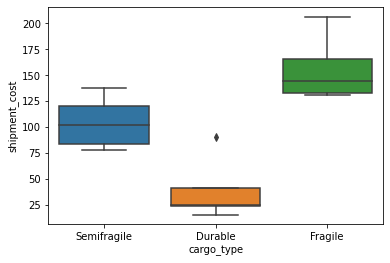

In [58]:
#Re-visualizing using the box plot

sns.boxplot(y="shipment_cost", x="cargo_type", data=df_gokart)


#### Ans 2(c) - As per the boxplot, the most expensive category is 'Fragile' and the least expensive category is 'Durable' (ignoring the single outlier value under Durable. This is similar to the costs determined by the regression equation


#### Ans 2(d) -  The Adj R2 is 0.737, which can be considered a good fit.  To improve the model fit, we can consider checking for multi-collienarity and other Model diagnostics


In [76]:
# Calculating the vif for the model

X = df_gokart_2[['cargo_type_Fragile' , 'cargo_type_Semifragile' , 'cargo_type_Durable']]

vif(X)

cargo_type_Fragile        1.0
cargo_type_Semifragile    1.0
cargo_type_Durable        1.0
dtype: float64

#### The vif is 1 which means that there is no multi-collinearity. Checking for other model diagnostics

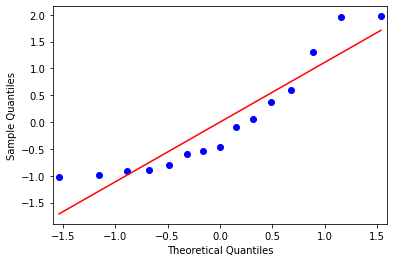

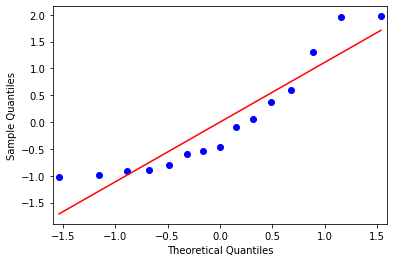

In [77]:
#QQ Plot
resid_go_kart_1 = reg_model_gokart_1.resid
sm.qqplot(resid_go_kart_1, line = 'r', fit = True)

#### The Q-Q plot suggests a non-normal distribution

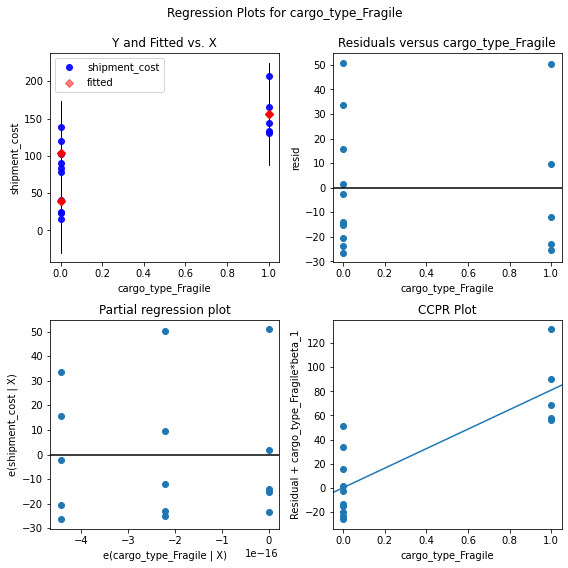

In [80]:
# Residual plots for the model w.r.t. 'cargo_type_Fragile'

resid_plot(reg_model_gokart_1, 'cargo_type_Fragile' ) 

#### The residual plots may not be a good indicator. Checking for outliers

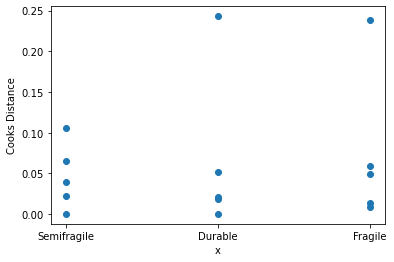

In [92]:
influence = reg_model_gokart_1.get_influence()

cooks_dist = influence.cooks_distance

plt.scatter(df_gokart.cargo_type, cooks_dist[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

#### Thus we can observe two outliers. We can attempt to drop them and retrain the model and observe the R2 value

In [97]:
df_gokart['cooks_dist'] = cooks_dist[0]

df_gokart[df_gokart['cooks_dist'] > 0.15]

,shipment_no,cargo_type,shipment_cost,cook_dist,cooks_dist
5,6,Fragile,206.4,0.238389,0.238389
12,13,Durable,90.0,0.242951,0.242951


#### Dropping these two outliers

In [98]:
df2 = df_gokart.drop(df_gokart[df_gokart['cooks_dist'] > 0.15].index)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 0 to 14
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   shipment_no    13 non-null     int64  
 1   cargo_type     13 non-null     object 
 2   shipment_cost  13 non-null     float64
 3   cook_dist      13 non-null     float64
 4   cooks_dist     13 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 624.0+ bytes


#### Re-creating the model with the filtered data

In [99]:
#Encoding the data with dummy encoding
x = df2
df_gokart_3 = pd.get_dummies(x,drop_first=False) # One of the categories is not dropped as the final model would required all three
df_gokart_3.head()

,shipment_no,shipment_cost,cook_dist,cooks_dist,cargo_type_Durable,cargo_type_Fragile,cargo_type_Semifragile
0,1,84.0,0.039056,0.039056,0,0,1
1,2,24.0,0.021455,0.021455,1,0,0
2,3,165.6,0.008649,0.008649,0,1,0
3,4,133.2,0.048786,0.048786,0,1,0
4,5,120.0,0.022839,0.022839,0,0,1


In [101]:
Y = df_gokart_3.shipment_cost
X = df_gokart_3[['cargo_type_Fragile' , 'cargo_type_Semifragile' , 'cargo_type_Durable']]

reg_model_gokart_2 = ols_fn(Y,X)

                            OLS Regression Results                            
Dep. Variable:          shipment_cost   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     39.89
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           1.71e-05
Time:                        23:04:10   Log-Likelihood:                -54.961
No. Observations:                  13   AIC:                             115.9
Df Residuals:                      10   BIC:                             117.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     68

C:\Users\NageshN\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### We can observe that Adj R2 has gone up from .737 to .866. We can observe model diagnostics

In [103]:
#Checking the vif

x = df_gokart_3[['cargo_type_Fragile' , 'cargo_type_Semifragile' , 'cargo_type_Durable']]

vif(x)

cargo_type_Fragile        1.0
cargo_type_Semifragile    1.0
cargo_type_Durable        1.0
dtype: float64

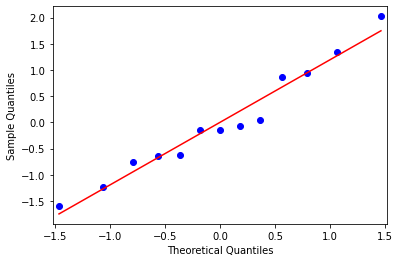

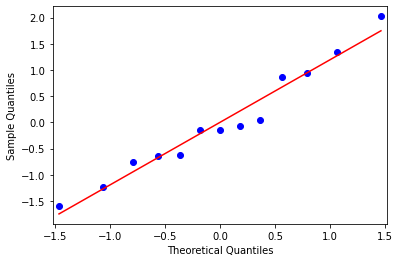

In [104]:
#Checking the qq plot

resid_go_kart_2 = reg_model_gokart_2.resid
sm.qqplot(resid_go_kart_2, line = 'r', fit = True)

#### Ans 2(d) Thus, we can observe that Adj R2 has gone up from .737 to .866. The QQ plot also suggests an overall normality assumption of the model. Hence we can conclude. PFB the updated regression equation :

shipment_cost = 68.55 + 74.85 x cargo_type_Fragile + 35.85 x cargo_type_Semifragile - 42.15 x cargo_type_Durable  

#### Ans 2(e) Predict the cost of shipping a package with semi-fragile cargo = > 68.55 + 35.85 = 104.4

## Q3: MLR with multiple variables – Employee Salary

An HR analyst in Unitech Pvt Ltd, wants to predict the annual salaries of given
employees using the potential explanatory variables in the file MLR_EmpSalary.csv
   - a) Estimate the appropriate multiple linear regression equation to predict the salary of
    an Unitech employee using all explanatory variables.
   - b) Do we need to exclude certain columns? Why?
   - c) Which department employees are paid the highest? By how much?
   - d) Do you see any discrimination in salaries earned by male and female employees?
   - e) What would be the estimated salary of a Data Scientist (joining engineering) with 10
        years of work experience. This woman has 18 years of total education, and will be
        supervising 4 junior employees. 

All datasets are available here: https://github.com/Accelerate-AI/Data-Science-GlobalBootcamp/tree/main/ClassAssignment/Assignment06

In [114]:
#Reading the file

df_emp_sal = pd.read_csv('MLR_EmpSalary.csv')
df_emp_sal.head()

,Employee,Salary,PreviousExp,YearsEmployed,YearsEducation,DirectRepotees,Female,Male,Engineering,Sales,Other
0,1,"$65,487",0,27,22,44,0,1,1,0,0
1,2,"$46,184",3,20,14,1,1,0,1,0,0
2,3,"$32,782",1,0,17,0,1,0,0,1,0
3,4,"$54,899",5,12,18,0,0,1,1,0,0
4,5,"$34,869",5,7,14,1,0,1,1,0,0


In [115]:
#Checking for data quality
df_emp_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Employee        46 non-null     int64 
 1   Salary          46 non-null     object
 2   PreviousExp     46 non-null     int64 
 3   YearsEmployed   46 non-null     int64 
 4   YearsEducation  46 non-null     int64 
 5   DirectRepotees  46 non-null     int64 
 6   Female          46 non-null     int64 
 7   Male            46 non-null     int64 
 8   Engineering     46 non-null     int64 
 9   Sales           46 non-null     int64 
 10  Other           46 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 4.1+ KB


In [122]:
#Changing the column names to snake case and keeping them all in lower case

df_emp_sal.columns = ['employee','salary','previous_exp','years_employed','years_education','direct_reportees',
'female',
'male',
'engineering',
'sales',
'other']

df_emp_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   employee          46 non-null     int64 
 1   salary            46 non-null     object
 2   previous_exp      46 non-null     int64 
 3   years_employed    46 non-null     int64 
 4   years_education   46 non-null     int64 
 5   direct_reportees  46 non-null     int64 
 6   female            46 non-null     int64 
 7   male              46 non-null     int64 
 8   engineering       46 non-null     int64 
 9   sales             46 non-null     int64 
 10  other             46 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 4.1+ KB


In [129]:
#Removing the $ sign from salary and converting it into int

df_emp_sal.salary = df_emp_sal.salary.str.replace('$', "")
df_emp_sal.salary = df_emp_sal.salary.str.replace(',', "")

df_emp_sal.salary.head()

<ipython-input-129-25d0571053b5>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_emp_sal.salary = df_emp_sal.salary.str.replace('$', "")


0    65487
1    46184
2    32782
3    54899
4    34869
Name: salary, dtype: object

In [138]:
df_emp_sal.salary = df_emp_sal.salary.astype('int64', copy = False)

In [139]:
df_emp_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   employee          46 non-null     int64
 1   salary            46 non-null     int64
 2   previous_exp      46 non-null     int64
 3   years_employed    46 non-null     int64
 4   years_education   46 non-null     int64
 5   direct_reportees  46 non-null     int64
 6   female            46 non-null     int64
 7   male              46 non-null     int64
 8   engineering       46 non-null     int64
 9   sales             46 non-null     int64
 10  other             46 non-null     int64
dtypes: int64(11)
memory usage: 4.1 KB


In [141]:
#Creating an OLS function :
Y = df_emp_sal.salary
X = df_emp_sal[['previous_exp','years_employed','years_education','direct_reportees','female','male','engineering','sales',
                'other']]


reg_model_emp_sal_1 = ols_fn(Y,X)

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     29.78
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           1.48e-13
Time:                        17:09:54   Log-Likelihood:                -449.82
No. Observations:                  46   AIC:                             915.6
Df Residuals:                      38   BIC:                             930.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4051.4713   2505.392  

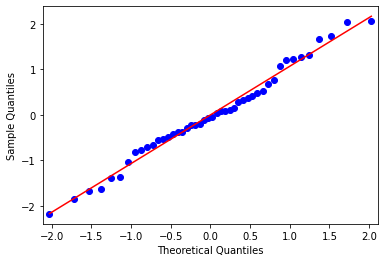

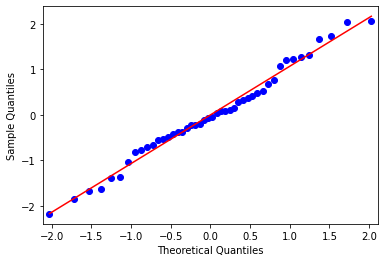

In [160]:
resid = reg_model_emp_sal_1.resid

sm.qqplot(resid, line = 'r', fit = True)

#### Ans 3.a - Creating an OLS equation as per the instructions, including all variables, without running any significance or other diagnostics 

salary = 4051.47 -61.40 x previous_exp + 664.62 x years_employed + 1599.13 x years_education + 130.07 x direct_reportees 
         + 2966.95 x female + 1084.51 x male + 4471.06 x engineering -3613.27 x sales + 3193.68 x other 


#### Ans 3.b Variables need to be dropped due to them not meeting the significance testing requirements

In [149]:
#### As per the significance tests for the variables, the following factors seem to be not contributing :

reg_model_emp_sal_1.pvalues[reg_model_emp_sal_1.pvalues > 0.05].index

Index(['const', 'previous_exp', 'direct_reportees', 'female', 'male'], dtype='object')

In [148]:
##Shortlisted factors as per the significance tests

reg_model_emp_sal_1.pvalues[reg_model_emp_sal_1.pvalues < 0.05].index

Index(['years_employed', 'years_education', 'engineering', 'sales', 'other'], dtype='object')

In [150]:
#Checking for multi-collinearity
X = df_emp_sal[['previous_exp','years_employed','years_education','direct_reportees','female','male','engineering','sales',
                'other']]

vif(X)

C:\Users\NageshN\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


previous_exp        1.135598
years_employed      1.626557
years_education     1.891932
direct_reportees    1.450076
female                   inf
male                     inf
engineering              inf
sales                    inf
other                    inf
dtype: float64

#### Dummy variables are giving VIF as infinity. We would drop one of the dummy variables for each category. 

The main features from which these groups were derived seem to be:
- a. Gender (which gave the dummy features 'male' and 'female')
- b. Role Type or Department(which gave the dummy features - 'sales', 'engineering' and 'others')

We will drop one of the genders and one of the roles

In [165]:
#Dropping the dummy features 'female' and 'sales'

df_emp_sal_2 = df_emp_sal.drop(columns = ['female','sales'])
df_emp_sal_2.head()

,employee,salary,previous_exp,years_employed,years_education,direct_reportees,male,engineering,other
0,1,65487,0,27,22,44,1,1,0
1,2,46184,3,20,14,1,0,1,0
2,3,32782,1,0,17,0,0,0,0
3,4,54899,5,12,18,0,1,1,0
4,5,34869,5,7,14,1,1,1,0


In [166]:
# Retraining the model

Y2 = df_emp_sal_2.salary
X2 = df_emp_sal[['previous_exp','years_employed','years_education','direct_reportees','male','engineering','other',
                ]]

reg_model_emp_sal_2 = ols_fn(Y2,X2)

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     29.78
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           1.48e-13
Time:                        18:34:42   Log-Likelihood:                -449.82
No. Observations:                  46   AIC:                             915.6
Df Residuals:                      38   BIC:                             930.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3405.1515   4972.565  

In [167]:
#checking for significant features

reg_model_emp_sal_2.pvalues[reg_model_emp_sal_2.pvalues < 0.05].index

Index(['years_employed', 'years_education', 'engineering', 'other'], dtype='object')

In [170]:
X2 = df_emp_sal[['previous_exp','years_employed','years_education','direct_reportees','male','engineering','other',
                ]]

vif(X2)

#We won't ignore years of education even though it has a high vif

previous_exp         2.675589
years_employed       4.409484
years_education     12.513147
direct_reportees     1.603977
male                 1.958297
engineering          3.025263
other                2.405507
dtype: float64

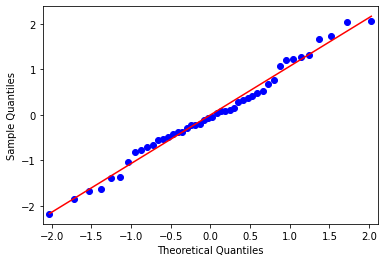

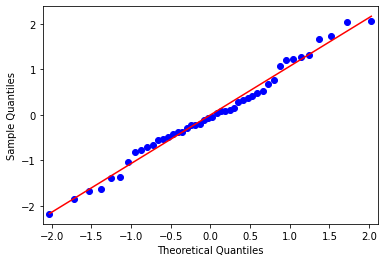

In [171]:
#Checking for QQ plot for residuals

resid = reg_model_emp_sal_2.resid

sm.qqplot(resid, line = 'r', fit = True)

In [172]:
reg_model_emp_sal_2.params

const               3405.151480
previous_exp         -61.403088
years_employed       664.628054
years_education     1599.136757
direct_reportees     130.070841
male               -1882.446666
engineering         8084.340260
other               6806.967271
dtype: float64

#### Ans 3.c - The highest paid department can be found based on the coefficients - Engineering is paid the highest, and by 8084.34 dollars in comparision to the 'sales' department as it is the base case



#### Ans 3.d - To view any pay gap between the genders, we can run the model again but drop the gender male instead of female

In [163]:
# Retraining the model

Y3 = df_emp_sal.salary
X3 = df_emp_sal[['previous_exp','years_employed','years_education','direct_reportees','female','engineering','sales',
                ]]

reg_model_emp_sal_3 = ols_fn(Y3,X3)

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     29.78
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           1.48e-13
Time:                        18:19:51   Log-Likelihood:                -449.82
No. Observations:                  46   AIC:                             915.6
Df Residuals:                      38   BIC:                             930.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             8329.6721   4592.075  

In [164]:
reg_model_emp_sal_3.params

const               8329.672086
previous_exp         -61.403088
years_employed       664.628054
years_education     1599.136757
direct_reportees     130.070841
female              1882.446666
engineering         1277.372989
sales              -6806.967271
dtype: float64

#### Ans 3.d - Thus we can see that the coefficent when we choose 'female' is +1882.44 and when we choose 'male' is -1882.44. Thus we can conclude that there is a differential of 1882.44 dollars between male and female employees. 

### Ans 3.e - We can retrain model 3 to predict the salary of the new female employee, who joins engineering :


- years of work experience = 10. 
- years of total education = 18, 
- direct reportees = 4
- gender = female

In [185]:
#Retraining the model with only significant factors (Retaining gender)



Y4= df_emp_sal_2.salary
X4= df_emp_sal[['years_employed', 'years_education', 'engineering', 'other', 'female'
                ]]

reg_model_emp_sal_4= ols_fn(Y4,X4)


                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     40.71
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           1.17e-14
Time:                        18:57:33   Log-Likelihood:                -451.28
No. Observations:                  46   AIC:                             914.6
Df Residuals:                      40   BIC:                             925.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1478.2686   4341.220     

In [186]:
#Calculating multicollinearity

vif(X4)


years_employed     4.026028
years_education    9.314639
engineering        2.958000
other              2.330263
female             2.206919
dtype: float64

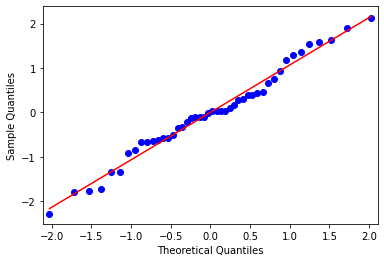

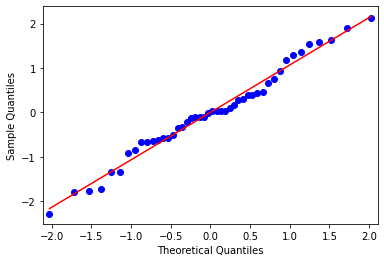

In [189]:
#Checking overall normality
sm.qqplot(reg_model_emp_sal_4.resid, line = 'r', fit = True)

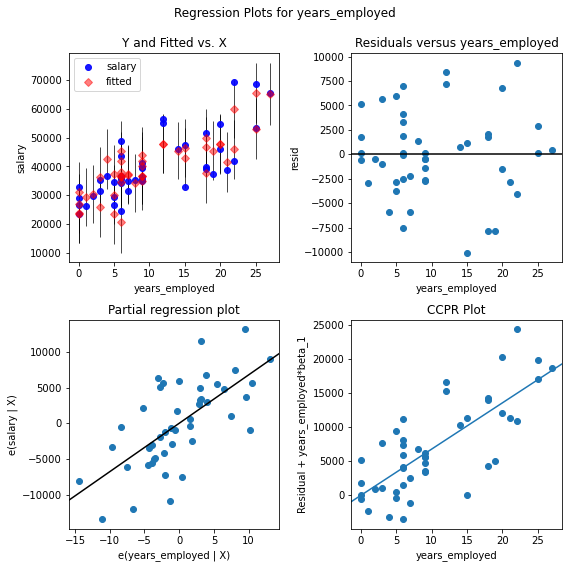

In [190]:
#Checking residuals plots w.r.t years employed

resid_plot(reg_model_emp_sal_4, 'years_employed' )


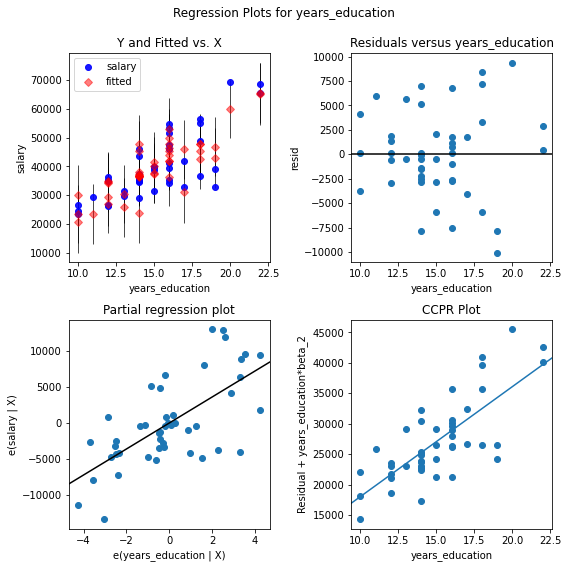

In [192]:
#Checking residuals plots w.r.t years_education

resid_plot(reg_model_emp_sal_4, 'years_education' )

In [187]:
reg_model_emp_sal_4.params

const             -1478.268632
years_employed      677.267202
years_education    1805.835169
engineering        8536.043386
other              6972.502685
female             1794.592185
dtype: float64

In [188]:
#Predicting salary as per Model 4 (after dropping insignificant variables)

const = -1089.724278
years_employed = 10
years_education = 18
direct_reportees = 4
female = 1 # We can mark this value as 1 as it was a dummy encoding of the categorical variable - gender
engineering = 1 # Due to dummy encoding
other = 0

salary = const + years_employed*693.93 + years_education*1839.71 + engineering*8383.86 + other* 6772.30 + female*1794.59

print('The salary of the new joinee Data Scientist is' , salary, 'dollars')


The salary of the new joinee Data Scientist is 49142.805722 dollars


#### Ans 3.e - The predicted salary is $49,142.80.


## Q4: MLR with Interaction effect – Stock Price Prediction

Stock market analyst are continually looking for reliable predictors of stock price.
Consider the problem of modelling the stock price of Utility companies. Two variable
that are though to influence the stock price(Y) are return of average equity (ROE) and
annual dividend rate.
Data for 16 utility stocks are provided in the file MLR_StockPrice.csv
- a) Estimate the MLR equation from the given dataset
- b) Interpret the Adjusted R-Squared value and each of the coefficients
- c) Revise the Stock Price prediction model for utility companies, to include and interaction term between ROE and Annual dividend rate. Does this new model fit the data better than was done in the first iteration


All datasets are available here: https://github.com/Accelerate-AI/Data-Science-GlobalBootcamp/tree/main/ClassAssignment/Assignment06

In [195]:
#Reading the data 

df_stocks = pd.read_csv('MLR_StockPrice.csv')
df_stocks.head()

,Electric Utility,Stock Price,ROE,Dividend
0,1,$23,13.7,2.36
1,2,$34,12.8,3.12
2,3,$20,6.9,2.48
3,4,$24,12.7,2.36
4,5,$20,15.3,1.92


In [196]:
#Renaming the columns and checking for data quality

df_stocks.columns = ['company_no', 'stock_price', 'roe', 'dividend']
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   company_no   16 non-null     int64  
 1   stock_price  16 non-null     object 
 2   roe          16 non-null     float64
 3   dividend     16 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 640.0+ bytes


In [197]:
#Converting stock price to float
df_stocks.stock_price = df_stocks.stock_price.str.replace('$','')
df_stocks.stock_price = df_stocks.stock_price.astype('float')

df_stocks.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   company_no   16 non-null     int64  
 1   stock_price  16 non-null     float64
 2   roe          16 non-null     float64
 3   dividend     16 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 640.0 bytes


<ipython-input-197-a6f1bb8ce5d6>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_stocks.stock_price = df_stocks.stock_price.str.replace('$','')


In [198]:
#Creating an OLS function

Y = df_stocks.stock_price
X = df_stocks [['roe','dividend']]

reg_model_stocks_1 = ols_fn(Y,X)

                            OLS Regression Results                            
Dep. Variable:            stock_price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     84.31
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           3.60e-08
Time:                        19:16:18   Log-Likelihood:                -29.298
No. Observations:                  16   AIC:                             64.60
Df Residuals:                      13   BIC:                             66.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.9537      3.405     -2.923      0.0

C:\Users\NageshN\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


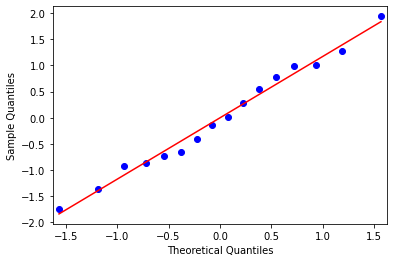

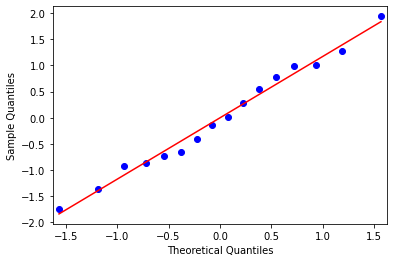

In [199]:
#All factors are significant
#Checking for normality using QQ plot

sm.qqplot(reg_model_stocks_1.resid, line = 'r', fit = True)

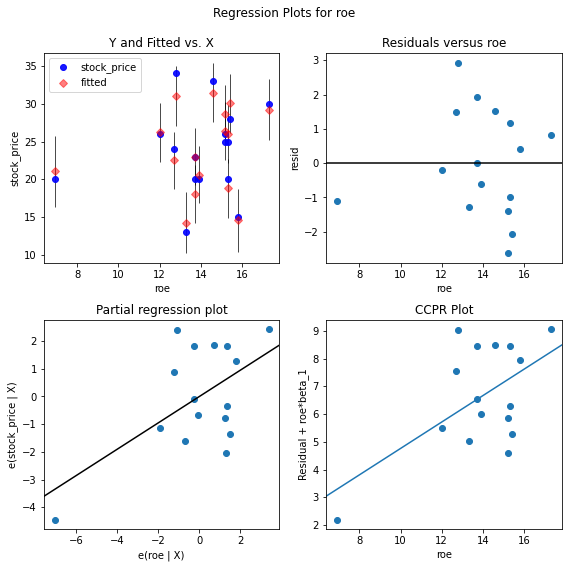

In [201]:
#Residual analysis w.r.t. roe

resid_plot(reg_model_stocks_1, 'roe')

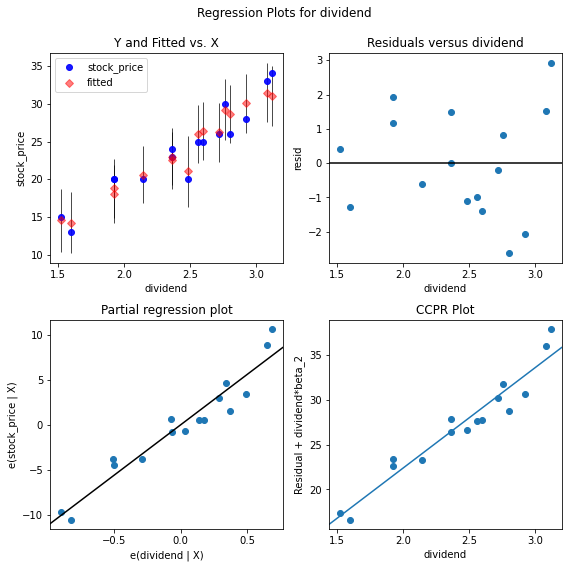

In [202]:
#Residual analysis w.r.t. dividend

resid_plot(reg_model_stocks_1, 'dividend')

##### There are very few data points, hence we may choose to not consider residual plots. But going by the residual plots, dividend seems to be a better indicator of the stock price than ROE. 

In [205]:
#Calculating VIF

vif(X)

roe         16.043336
dividend    16.043336
dtype: float64

#### A high VIF indicates high multicollinearity. Also, for two variables, the VIF would be identical. Ref below. 

https://stats.stackexchange.com/questions/180928/identical-vif-tolerance-scores-multiple-regression

In [204]:
#Retrieving the coefficients :

reg_model_stocks_1.params

const       -9.953671
roe          0.476232
dividend    11.194324
dtype: float64

#### Ans 4.a - The MLR equation is given below :

stock price = const + ROE x 0.47 + dividend x 11.19

#### Ans 4.b - Interpreting adj R2 and coefficients

Adjusted R2 is .917 which means that 91.7% of the variance is explained by the model. (Ref below) 
- The interpretation of the coefficients :
    - A 1% increase in ROE would lead to 0.47 dollar increase in the stock price
    - A 1% increase in Dividend would lead to 11.19 dollars increase in the stock price


https://www.ibm.com/docs/en/cognos-analytics/11.1.0?topic=terms-adjusted-r-squared

#### Ans 4.c - Solution : Building a new model with the interaction effects, by importing sklearn. (Reference articles below)


https://towardsdatascience.com/interaction-effect-in-multiple-regression-3091a5d0fadd

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [215]:
from sklearn.preprocessing import PolynomialFeatures


X = df_stocks [['roe','dividend']]

#generating interaction terms
x_interaction = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(X)

#creating a new dataframe with the interaction terms included
df_stocks_interaction = pd.DataFrame(x_interaction, columns = ['roe','dividend','roe_dividend_interact'])

df_stocks_interaction.head()
                              

,roe,dividend,roe_dividend_interact
0,13.7,2.36,32.332
1,12.8,3.12,39.936
2,6.9,2.48,17.112
3,12.7,2.36,29.972
4,15.3,1.92,29.376


In [216]:
#Creating a new model with the interaction term included

Y = df_stocks.stock_price
X = df_stocks_interaction[['roe','dividend','roe_dividend_interact']]

reg_model_stocks_2 = ols_fn(Y,X)


                            OLS Regression Results                            
Dep. Variable:            stock_price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     60.85
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           1.57e-07
Time:                        20:06:12   Log-Likelihood:                -28.107
No. Observations:                  16   AIC:                             64.21
Df Residuals:                      12   BIC:                             67.31
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -44.68

C:\Users\NageshN\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


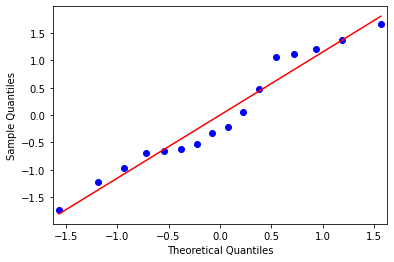

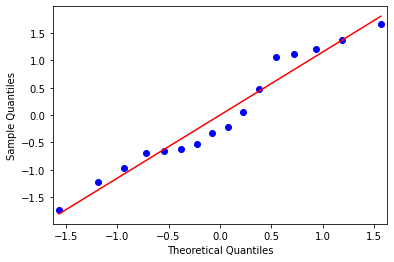

In [217]:
#QQ plot for overall normality

sm.qqplot(reg_model_stocks_2.resid, line = 'r', fit = True)

#### The  new model (Model 2)  with interaction term has a greater fit (.923) but two out of the three variables don't pass the significance test. The QQ plot also suggests a less overall normality in comparision to Model 1. Hence we can consider dropping the insignificant variables and retraining the model

In [218]:
#Dropping insignificant variables and retraining

Y = df_stocks.stock_price
X = df_stocks_interaction.drop(columns = ['roe','roe_dividend_interact'])

reg_model_stocks_3 = ols_fn(Y,X)



                            OLS Regression Results                            
Dep. Variable:            stock_price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     116.2
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           3.67e-08
Time:                        20:11:51   Log-Likelihood:                -32.556
No. Observations:                  16   AIC:                             69.11
Df Residuals:                      14   BIC:                             70.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2472      2.565     -1.266      0.2

C:\Users\NageshN\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


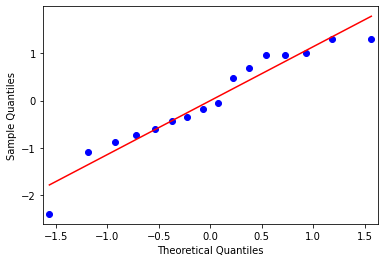

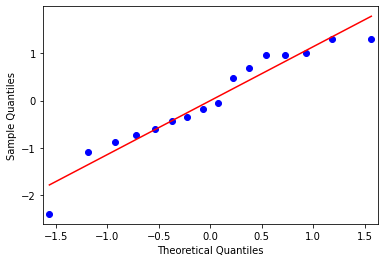

In [219]:
#QQ plot for overall normality

sm.qqplot(reg_model_stocks_3.resid, line = 'r', fit = True)

#### Attempting outlier diagnostics



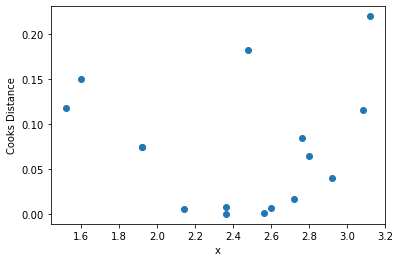

In [224]:

influence = reg_model_stocks_3.get_influence()

cooks_dist = influence.cooks_distance


plt.scatter(df_stocks_interaction.dividend, cooks_dist[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [227]:
#We can consider dropping the outliers greater than 0.17

df_stocks_interaction['cooks_dist'] = cooks_dist[0]
df_stocks_interaction['stock_price'] = df_stocks['stock_price'] 
 
df_stocks_interaction[df_stocks_interaction['cooks_dist'] > 0.17]

,roe,dividend,roe_dividend_interact,cooks_dist,stock_price
1,12.8,3.12,39.936,0.219786,34.0
2,6.9,2.48,17.112,0.181916,20.0


In [228]:
df_stocks_interaction_cooks = df_stocks_interaction[df_stocks_interaction['cooks_dist'] < .17]
df_stocks_interaction_cooks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 15
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   roe                    14 non-null     float64
 1   dividend               14 non-null     float64
 2   roe_dividend_interact  14 non-null     float64
 3   cooks_dist             14 non-null     float64
 4   stock_price            14 non-null     float64
dtypes: float64(5)
memory usage: 672.0 bytes


In [229]:
#Retraining the model after dropping the outliers

Y = df_stocks_interaction_cooks.stock_price
X = df_stocks_interaction_cooks.dividend

reg_model_stocks_4 = ols_fn(Y,X)


                            OLS Regression Results                            
Dep. Variable:            stock_price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     152.5
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           3.51e-08
Time:                        20:20:59   Log-Likelihood:                -24.817
No. Observations:                  14   AIC:                             53.63
Df Residuals:                      12   BIC:                             54.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0938      2.107     -0.994      0.3

C:\Users\NageshN\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


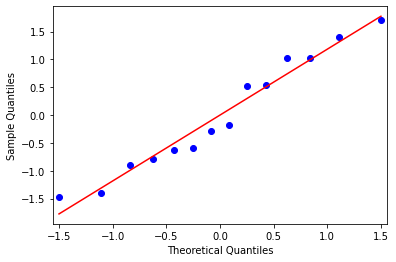

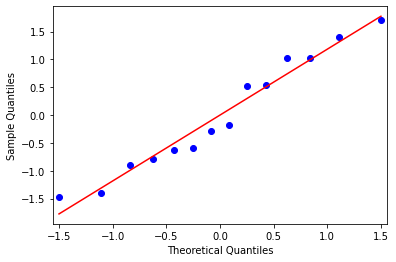

In [231]:
# QQ plot

sm.qqplot(reg_model_stocks_4.resid, line = 'r', fit = True)

#### Ans4.c - After dropping the outliers and retraining the model, the Adj R2 = .921, which is nearly equal to the Adj R2 of the model with interaction variables. The model with interaction term has better fit but we drop the non-significant variables and retrain. The final model has a higher fit than the first model. Summarizing below. 

In [237]:
print('Model 1 - Raw - Adj RSquare', round(reg_model_stocks_1.rsquared_adj,3) )
print('Model 2 - Including Interaction Term - Adj RSquare', round(reg_model_stocks_2.rsquared_adj,3) )
print('Model 3 - Dropping Non-significant factors - Adj RSquare', round(reg_model_stocks_3.rsquared_adj,3) )
print('Model 4 - Dropping Outliers', round(reg_model_stocks_4.rsquared_adj,3) )

Model 1 - Raw - Adj RSquare 0.917
Model 2 - Including Interaction Term - Adj RSquare 0.923
Model 3 - Dropping Non-significant factors - Adj RSquare 0.885
Model 4 - Dropping Outliers 0.921
